In [35]:
import numpy as np 
import pandas as pd 

In [36]:
train = pd.read_csv("IS_project.csv")

In [37]:
#train
#train.dtypes
#train.isnull().sum()

In [38]:
train.columns

Index(['C_per', 'Si_per', 'Mn_per', 'P_per', 'S_per', 'Cu_per', 'Mg_per',
       'Hardness_BHN', 'Nodularity_per', 'Pearlite_per', 'Ferrite_per',
       'Nodule_Count', 'Sand_AFS_Fresh', 'Sand_AFS_Returned', 'Clay_Fresh',
       'Clay_Returned', 'FRS', 'KOS', 'PH_Fresh_Sand', 'PH_Returned_Sand ',
       'Sand_temp', 'RT_Hum', 'Hum_per', 'Stripping', 'Viscosity', 'Baume ',
       'Remarks'],
      dtype='object')

In [39]:
X_tr = train[['C_per', 'Si_per', 'Mn_per', 'P_per', 'S_per', 'Cu_per', 'Mg_per',
       'Hardness_BHN', 'Nodularity_per', 'Pearlite_per', 'Ferrite_per',
       'Nodule_Count', 'Sand_AFS_Fresh', 'Sand_AFS_Returned', 'Clay_Fresh',
       'Clay_Returned', 'FRS', 'KOS', 'PH_Fresh_Sand', 'PH_Returned_Sand ',
       'Sand_temp', 'RT_Hum', 'Hum_per', 'Stripping', 'Viscosity', 'Baume ']]
y_tr = train['Remarks']


In [40]:
#X_tr

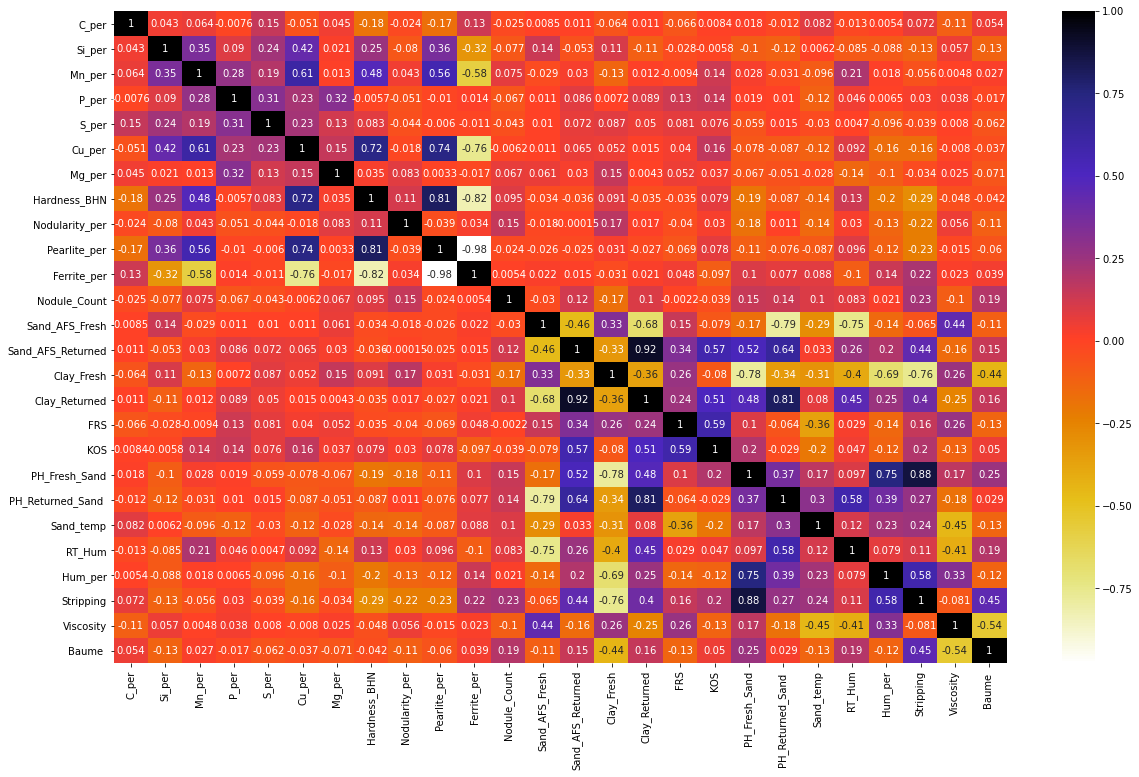

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt 
#Using Pearson Correlation
plt.figure(figsize=(20,12))
cor = X_tr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [42]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_tr, 0.8)
len(set(corr_features))

5

In [44]:
corr_features

{'Clay_Returned',
 'Ferrite_per',
 'PH_Returned_Sand ',
 'Pearlite_per',
 'Stripping'}

In [45]:
train.columns

Index(['C_per', 'Si_per', 'Mn_per', 'P_per', 'S_per', 'Cu_per', 'Mg_per',
       'Hardness_BHN', 'Nodularity_per', 'Pearlite_per', 'Ferrite_per',
       'Nodule_Count', 'Sand_AFS_Fresh', 'Sand_AFS_Returned', 'Clay_Fresh',
       'Clay_Returned', 'FRS', 'KOS', 'PH_Fresh_Sand', 'PH_Returned_Sand ',
       'Sand_temp', 'RT_Hum', 'Hum_per', 'Stripping', 'Viscosity', 'Baume ',
       'Remarks'],
      dtype='object')

In [46]:
X_tr=X_tr.drop(['Clay_Returned','Ferrite_per','PH_Returned_Sand ','Pearlite_per','Stripping','Baume ','FRS','Clay_Fresh','Sand_AFS_Fresh','Sand_temp','Viscosity','PH_Fresh_Sand','Sand_AFS_Returned','Cu_per','KOS','P_per','Hum_per'],axis=1)




In [47]:
X_tr.columns

Index(['C_per', 'Si_per', 'Mn_per', 'S_per', 'Mg_per', 'Hardness_BHN',
       'Nodularity_per', 'Nodule_Count', 'RT_Hum'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_tr, y_tr, train_size=0.8, test_size=0.2,
                                                                random_state=0)


X_train = X_train_full.copy()
X_valid = X_valid_full.copy()



In [49]:
import xgboost as xgb
xgbr = xgb.XGBClassifier(learning_rate=0.1,n_estimators=1000,reg_lambda=9,objective='reg:squarederror',max_depth=8)
# print(xgbr)
xtrain=X_train
ytrain=y_train

xgbr.fit(xtrain, y_train,
         early_stopping_rounds=50, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=9, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
X_tr.describe()

,C_per,Si_per,Mn_per,S_per,Mg_per,Hardness_BHN,Nodularity_per,Nodule_Count,RT_Hum
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,3.419416,2.508331,0.331027,0.012432,0.046997,195.787234,82.612158,284.036474,30.364742
std,0.168605,0.163560,0.100334,0.022781,0.007226,28.163856,2.523133,47.194135,1.679160
min,2.980000,1.890000,0.012000,0.002000,0.020000,125.000000,70.210000,145.000000,28.000000
25%,3.354000,2.424000,0.273000,0.008000,0.044000,168.000000,81.030000,262.000000,29.000000
50%,3.405000,2.498000,0.328000,0.008000,0.047000,199.000000,82.720000,292.000000,30.000000
75%,3.484000,2.587000,0.391000,0.008000,0.050000,209.000000,84.040000,305.000000,31.000000
max,3.980000,2.898000,0.652000,0.390000,0.070000,272.000000,88.300000,451.000000,35.000000


In [51]:
xgbr.get_booster().get_score(importance_type="gain")

{'S_per': 1.1063740915266795,
 'C_per': 0.03984016296288185,
 'Nodule_Count': 0.03612834727797211,
 'Si_per': 0.39816281000967957,
 'Mn_per': 0.010012182998485915,
 'Hardness_BHN': 0.003926886805134042,
 'Mg_per': 0.0023652157310797904,
 'RT_Hum': 0.023135249730025315,
 'Nodularity_per': 0.01894256847012795}

In [52]:
print(xgbr.feature_importances_)


[0.02430927 0.242947   0.00610913 0.6750763  0.00144318 0.00239607
 0.01155819 0.02204443 0.01411644]


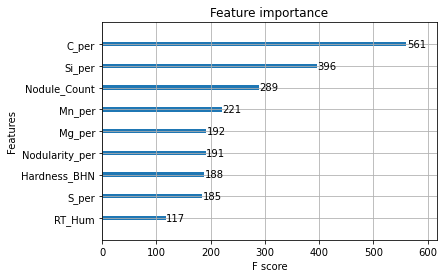

In [53]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgbr)
pyplot.show()

In [54]:
# from xgboost import plot_tree
# plot_tree(xgbr)
# plt.show()

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Mean cross-validation score: 0.9411


0.9375

In [56]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())


K-fold CV average score: 0.9412


0.9375

In [57]:
from sklearn.metrics import mean_squared_error
xtest=X_valid
ytest=y_valid
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.5f" % mse)
print("RMSE: %.5f" % (mse**(1/2.0)))
 

MSE: 0.06818
RMSE: 0.26112


MSE: 0.04545
RMSE: 0.21320

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


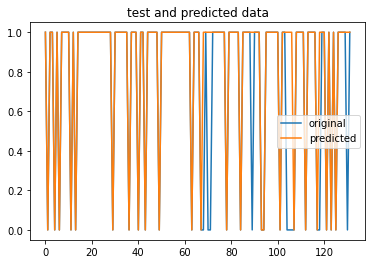

In [58]:
import matplotlib.pyplot as plt
xtest=X_valid
ytest=y_valid
ypred = xgbr.predict(xtest)
x_ax = range(len(ytest))

plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

In [63]:
pred = np.array([[3.64,2.66,0.012,0.16,0.02,125.0,700.21,184,28]])

In [64]:
y_RF = xgbr.predict(pred)
y_RF

array([1])

In [65]:
y_RF[0]

1